# Interpeting median income by state
Author: Joel Wheatley

Goal: To take data set of median income values of citizens in specific states over time and graph them to look for trends.

Hypothesis: The US will have an overall steady growth of purchasing power over the last 80 years, with strongest growth occuring in the northeast and the weakest growth occuring in Mid-Western and Southern states.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('download.csv', na_values = '(NA)')

## General Notes on the dataset
* The data includes state, regional, and country wide data on the income of each state, both total and per capita
* The last 7 rows are not data points, but notes on the data set. We will need to get rid of them.
* Includes geo data and labels of the OECD, which we will not need for this project
* Each year is a column, and each type of data is a row value. We will want to flip these so that the value type is a column and each year is a row, while preserving each state as a row value.
* Hawaii and Alaska do not have data before the 1950's, as they not states yet

In [3]:
df['State or DC'].unique()

array(['United States', 'Alabama', 'Alaska*', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii*', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West', nan], dtype=object)

# Drop the last few rows of the dataframe, as they were just information left over from the text file, not actual data

In [4]:
df.drop(df.index[-7:], inplace = True)

# Get rid of unnecessary columns

In [5]:
df2 = df.drop(['Bureau of Economic Analysis', 'GeoFips','LineCode', 'Description'], axis = 1)

# Take all of those year columns and turn them into a single variable column called "Year"

In [6]:
df2 = pd.melt(df2, id_vars = ['State or DC','GeoName'], var_name = 'Year')

# Create a unique column which is a combination of the state/region, and the year the data is taken

In [7]:
df2['styr'] = df2['State or DC'] + df2['Year']

In [8]:
df2

,State or DC,GeoName,Year,value,styr
0,United States,Personal income (thousands of dollars),1929,65507000.0,United States1929
1,United States,Population (persons) 1/,1929,124038000.0,United States1929
2,United States,Per capita personal income (dollars) 2/,1929,528.0,United States1929
3,Alabama,Personal income (thousands of dollars),1929,583342.0,Alabama1929
4,Alabama,Population (persons) 1/,1929,2649000.0,Alabama1929
5,Alabama,Per capita personal income (dollars) 2/,1929,220.0,Alabama1929
6,Alaska*,Personal income (thousands of dollars),1929,NaN,Alaska*1929
7,Alaska*,Population (persons) 1/,1929,NaN,Alaska*1929
8,Alaska*,Per capita personal income (dollars) 2/,1929,NaN,Alaska*1929
9,Arizona,Personal income (thousands of dollars),1929,184470.0,Arizona1929


In [9]:
df2['Type'] = 'State'

# We want to look at the population, state GDP, and per capita income as columns, not as labels in rows. So let's pivot them into columns that we can use, and then rearrange and rename the columns to something more intuitive

In [10]:
dummy1 = df2.pivot('styr', 'GeoName' , 'value') #Contains pivoted income data with a "State Year" index
dummy2 = df2[['State or DC', 'Year', 'styr', 'Type']].drop_duplicates() #to be used to add years and state to pivoted table

In [11]:
df2= dummy1.merge(dummy2, left_index = True, right_on = 'styr') #inner join on the state / year variable (unique for each)
df2.reset_index(inplace = True) 
df2.drop(['styr', 'index'], axis = 1, inplace = True) #Get rid of the old index and 'styr' variable, as they are no longer necessary
df2.dropna(inplace = True) #Get Rid of all NaN data left

#Reorder the columns so that it is more intuitive (first state, then year, then the data)
col = df2.columns.tolist() 
col = col[-2:] + col[:-2]
df2 = df2[col]

# Rename the pivoted columns to something more readable
df2.rename(columns = {'State or DC': 'State','Per capita personal income (dollars) 2/': 'Income per Capita', 
            'Personal income (thousands of dollars)' : 'Personal Income',
           'Population (persons) 1/' : 'Population'}, inplace = True)

#Make sure that data is of the correct type for when we want to plot it or compute on it
df2[['Income per Capita', 'Personal Income', 'Population']] = df2[['Income per Capita', 'Personal Income', 'Population']].astype(float)
df2['Year'] = df2['Year'].astype(int)

# The issue with this data is that while the incomes increase year after year, but we want to make sure this is not just from inflation. Let's import some data from the _Consumer Price Index_ so that we can normalize the data with respect to it.

In [12]:
df = pd.read_csv('CPIAUCNS.csv')

# The CPI is given monthly, but we only need it once per year. Let's pull the data from January first every year.

In [13]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['DATE'].dt.month==1]
df['YEAR'] = df['DATE'].dt.year
df.drop('DATE', axis = 1, inplace = True)

# Import the plotting libraries to be able to visualize the data

In [14]:
from matplotlib.axes import Axes
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

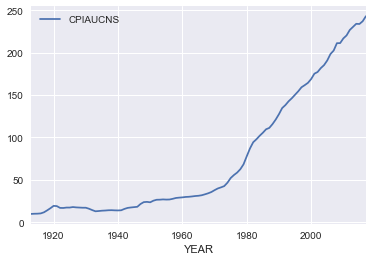

In [15]:
df.plot(x = 'YEAR', y = 'CPIAUCNS')

In [16]:
df_PCI = df2[['Year', 'State', 'Income per Capita']].copy()
df_PCI=df_PCI.pivot(index= 'Year', columns = 'State', values = 'Income per Capita')


In [17]:
df_PCI

State,Alabama,Alaska*,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Far West,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1929,220.0,NaN,430.0,207.0,753.0,472.0,806.0,775.0,1253.0,683.0,...,273.0,345.0,528.0,372.0,471.0,371.0,534.0,354.0,469.0,477.0
1930,159.0,NaN,321.0,152.0,584.0,356.0,627.0,591.0,1107.0,526.0,...,194.0,262.0,402.0,304.0,362.0,286.0,402.0,256.0,362.0,375.0
1931,164.0,NaN,309.0,153.0,549.0,353.0,590.0,566.0,945.0,495.0,...,201.0,254.0,375.0,297.0,337.0,286.0,376.0,258.0,333.0,372.0
1932,207.0,NaN,362.0,182.0,605.0,371.0,661.0,647.0,963.0,556.0,...,242.0,291.0,427.0,314.0,381.0,323.0,442.0,313.0,380.0,414.0
1933,216.0,NaN,416.0,204.0,665.0,445.0,715.0,705.0,1031.0,610.0,...,263.0,325.0,477.0,391.0,414.0,354.0,491.0,338.0,461.0,498.0
1934,249.0,NaN,462.0,243.0,777.0,541.0,815.0,871.0,1143.0,714.0,...,302.0,372.0,539.0,463.0,469.0,394.0,570.0,391.0,518.0,552.0
1935,266.0,NaN,505.0,253.0,802.0,534.0,869.0,955.0,1210.0,738.0,...,332.0,418.0,579.0,447.0,485.0,426.0,601.0,419.0,551.0,606.0
1936,242.0,NaN,479.0,228.0,780.0,508.0,779.0,800.0,1141.0,717.0,...,298.0,404.0,531.0,446.0,457.0,394.0,583.0,371.0,508.0,560.0
1937,251.0,NaN,491.0,246.0,791.0,519.0,847.0,907.0,1164.0,736.0,...,310.0,417.0,561.0,460.0,491.0,431.0,617.0,390.0,515.0,586.0


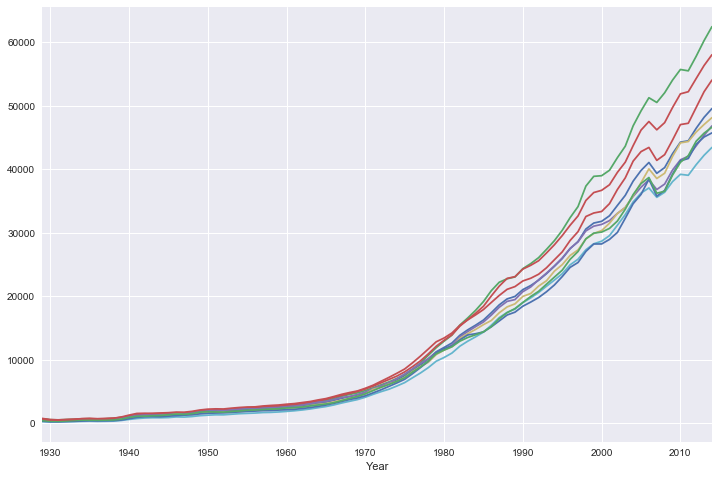

In [18]:
df_PCI.plot(
    y = ['United States', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West',],
    legend = False, 
    figsize = (12,8))


# Let's try a different style to make it look more interesting

In [19]:
import matplotlib.style as style
style.use('fivethirtyeight')

# This looks like an exponential function, so let's change it to a logarithmic scale. Each tick upwards doubles the value.

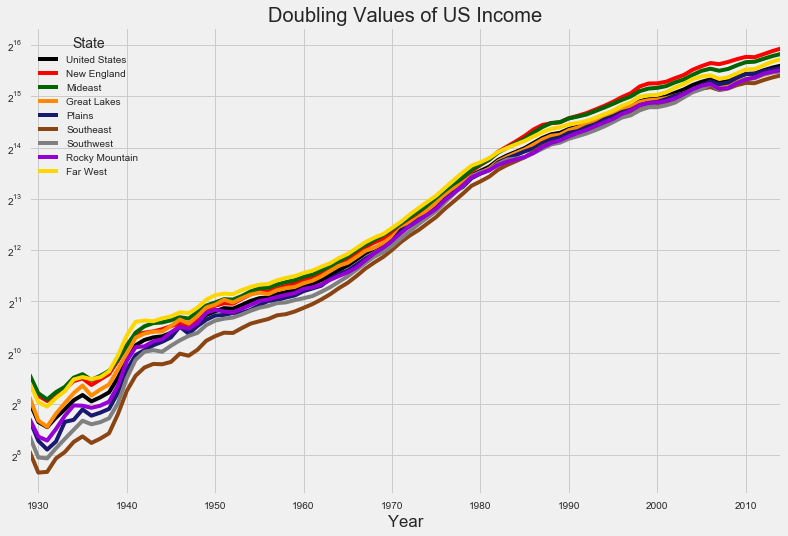

In [20]:

df_PCI.plot(
    y = ['United States', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West'], 
    figsize = (12,8), 
    color= ['black','red', 'darkgreen', 'darkorange', 'midnightblue', 'saddlebrown', 'grey', 'darkviolet', 'gold']
    )
plt.yscale('log', basey = 2)
plt.title('Doubling Values of US Income')

# Now let's divide the income per capita by the CPI of that year, and multiply it by the CPI from 2010. This will give us the adjusted income in 2010 dollars

In [21]:
df_norm = df2[['Year', 'State', 'Income per Capita']].merge(df, left_on = 'Year', right_on = 'YEAR')
CPI_2010 = df_norm[df_norm['YEAR'] == 2010].reset_index().get_value(1, col = 'CPIAUCNS')
df_norm['Income per Capita'] = df_norm['Income per Capita'] / df_norm['CPIAUCNS'] * CPI_2010

df_norm.drop(['CPIAUCNS', 'YEAR'], axis = 1, inplace = True)
df_norm = df_norm.pivot('Year', 'State', 'Income per Capita')

In [65]:
df_norm.head()

State,Alabama,Alaska*,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Far West,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1929,2787.785965,NaN,5448.854386,2623.053158,9541.831053,5981.068070,10213.434035,9820.609649,15877.708246,8654.808246,...,3459.388947,4371.755263,6690.686316,4713.892632,5968.396316,4701.220877,6766.716842,4485.801053,5943.052807,6044.426842
1930,2014.808947,NaN,4067.633158,1926.106667,7400.304561,4511.144561,7945.190000,7489.006842,14027.632105,6665.342807,...,2458.320351,3319.999649,5094.045263,3852.213333,4587.175088,3624.121754,5094.045263,3243.969123,4587.175088,4751.907895
1931,2235.010566,NaN,4211.086981,2085.101321,7481.834151,4810.723962,8040.586792,7713.512075,12878.566981,6745.916038,...,2739.250755,3461.540755,5110.542453,4047.549623,4592.674151,3897.640377,5124.170566,3516.053208,4538.161698,5069.658113
1932,3136.657972,NaN,5485.363217,2757.834545,9167.526923,5621.739650,10016.091399,9803.950280,14592.278392,8425.033007,...,3667.010769,4409.504685,6470.304126,4758.022238,5773.269021,4894.398671,6697.598182,4742.869301,5758.116084,6273.315944
1933,3628.247442,NaN,6987.735814,3426.678140,11170.298837,7474.861628,12010.170930,11842.196512,17318.162558,10246.439535,...,4417.727209,5459.168605,8012.379767,6567.799767,6954.140930,5946.294419,8247.543953,5677.535349,7743.620698,8365.126047


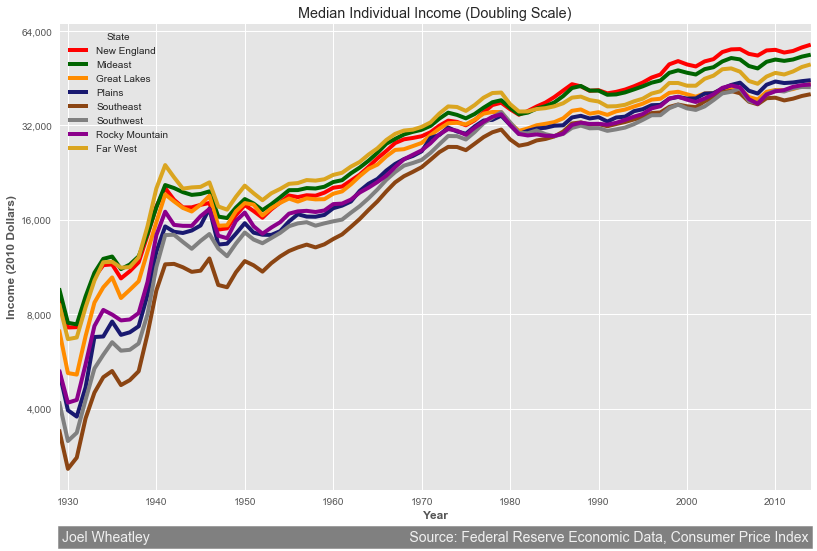

In [98]:
regions = ['New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West']

fig, ax = plt.subplots()
pp_graph = df_norm.plot(
        y = regions, 
        figsize = (12,8),
        color= ['red', 'darkgreen', 'darkorange', 'midnightblue', 'saddlebrown', 'grey', 'darkmagenta', 'goldenrod'],
        logy = True,
        ax = ax)
plt.yscale('log', basey = 2)
plt.ylabel('Income (2010 Dollars)', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.yticks([4000, 8000, 16000, 32000, 64000], ['4,000', '8,000', '16,000', '32,000', '64,000'])
plt.title('Median Individual Income (Doubling Scale)')
pp_graph.text(x = 1929.3, 
              y = 7 * CPI_2010,    
              s = 'Joel Wheatley                                                                   Source: Federal Reserve Economic Data, Consumer Price Index',
              fontsize = 14, 
              color = '#f0f0f0',
              backgroundcolor = 'grey')

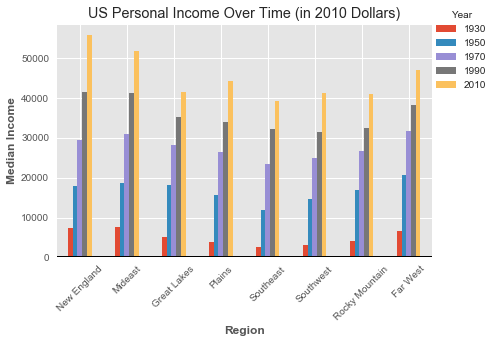

In [64]:
style.use('ggplot')
pp_graph = df_norm[regions].loc[[1930, 1950, 1970, 1990, 2010]].transpose().plot(
    kind = 'bar')
plt.legend(title = 'Year', loc = (1,.7))
plt.ylabel('Median Income', fontweight = 'bold')
plt.xlabel('Region', fontweight = 'bold')
plt.title('US Personal Income Over Time (in 2010 Dollars)')
pp_graph.axhline(y = 0, color = 'black', linewidth = 2, alpha = 1)
for tick in pp_graph.get_xticklabels():
    tick.set_rotation(45)
#plt.yscale('log', basey = 2)

## Conclusion: The purchasing power of the median citizen is still increasing, but it is doing so at a much slow rate in recent years than it was in the time between 1930 and 1970. The purchasing poser of the median citizen doubled three times in that period, while it has not doubled itself since 1970 in any region but New England.
* The 
** The Purchasing power gap closed from 1930 to 1970, but has not moved much since then. **